# KL-дивергенция

$D_{KL} (p|p') =  \sum \limits_{j=1}^m p_j  \log_q \frac{p_j}{p'_j} = CE(p|p') - H(p) \geq 0 $

**KL-дивергенция - это несимметричный аналог расстояния**

1. $D_{KL} (p|p') \geq 0 $

2. $D_{KL} (p|p) = 0 $

3. $D_{KL}(p|p') = 0 \implies p = p'$

## Пример 1

$X \sim Bern(0.6), \; Y \sim Bern(0.7), \; Z \sim Bern(0.8)$

In [ ]:
from scipy.stats import entropy
from scipy.stats import bernoulli
import numpy as np


p_x = 0.6
p_y = 0.7
p_z = 0.8


KL_xy = entropy(bernoulli.pmf([0,1], p_x) , bernoulli.pmf([0,1], p_y))
KL_yz = entropy(bernoulli.pmf([0,1], p_y) , bernoulli.pmf([0,1], p_z))
KL_xz = entropy(bernoulli.pmf([0,1], p_x) , bernoulli.pmf([0,1], p_z))

print('KL(p_x| p_y) + KL(p_y | p_z) = ', KL_xy, '+', KL_yz, '=', KL_xy + KL_yz)
print('KL(p_x| p_z) = ', KL_xz)

KL(p_x| p_y) + KL(p_y | p_z) =  0.0225824210843575 + 0.02816755759528347 = 0.05074997867964097
KL(p_x| p_z) =  0.10464962875290965


## Пример 2

$X \sim \mathcal{N}(\mu_1, \sigma_1), \; Y \sim \mathcal{N}(\mu_2, \sigma_2)$

$p = \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \bigl[ - \frac{(x - \mu)^2}{2 \sigma^2}\bigr]$

1. $H(p) = - \int p(x) ln [p(x)]  dx =  - \int p(x) [ln \frac{1}{\sqrt{2 \pi} \sigma} - \frac{(x - \mu)^2}{2 \sigma^2}] dx = - ln \frac{1}{\sqrt{2 \pi} \sigma} + \frac{1}{2 \sigma^2} \int (x - \mu)^2 p(x) dx =  - ln \frac{1}{\sqrt{2 \pi} \sigma} + \frac{1}{2}$

2. $CE(p_1| p_2) =  - \int p_1(x) [ln \frac{1}{\sqrt{2 \pi} \sigma_2} - \frac{(x - \mu_2)^2}{2 \sigma_2^2}] dx =  - ln \frac{1}{\sqrt{2 \pi} \sigma_2} + \frac{1}{2 \sigma_2^2} \int (x - \mu_2)^2 p_1(x) dx = $

$=  - ln \frac{1}{\sqrt{2 \pi} \sigma_2} + \frac{1}{2 \sigma_2^2} \int ((x - \mu_1) + (\mu_1 - \mu_2))^2 p_1(x) dx
=  - ln \frac{1}{\sqrt{2 \pi} \sigma_2} + \frac{1}{2 \sigma_2^2} [\sigma_1^2 + (\mu_1 - \mu_2)^2]$

3. $D_{KL}(p_1 | p_2) = CE(p_1 | p_2) - H(p_1) =  - ln \frac{1}{\sqrt{2 \pi} \sigma_2} + \frac{1}{2 \sigma_2^2} [\sigma_1^2 + (\mu_1 - \mu_2))^2]  + ln \frac{1}{\sqrt{2 \pi} \sigma_1} - \frac{1}{2} = $

$= \ln \frac{\sigma_2}{\sigma_1} + \frac{1}{2}[\frac{\sigma^2_1}{\sigma^2_2} - 1] + \frac{1}{2 \sigma_2^2} (\mu_1 - \mu_2))^2 $

## Свойства KL-дивергенции

1. Если $p(x,y) = p_x(x) \times p_y(y), \; q(x,y) = q_x(x) \times q_y(y)$, то $D_{KL}(p | q) = D_{KL}(p_x|q_x) + D_{KL}(p_y|q_y)$

2. $D_{KL}(\lambda p_1 + (1-\lambda) p_2 | \lambda q_1 + (1-\lambda) q_2) \leq \lambda D_{KL}(p_1 | q_1) + (1 - \lambda) D_{KL}(p_2 | q_2)$

3. $\sup \limits_{A \in \mathcal{F}}  |\int \limits_A p(x)dx - \int \limits_A q(x)dx| \leq \sqrt{\frac12 D_{KL}(p | q)}$

4. $I(X,Y) = D_{KL}(p_{(X,Y)}(x,y) | p_X(x) \times p_Y(y)) = H(p_X(x)) + H(p_Y(y)) - H(p_{(X,Y)}(x,y))$ - взаимная информация (где $p_X(x) = \int p_{(X,Y)}(x,y) dy$ и $p_Y(y) = \int p_{(X,Y)}(x,y) dy$)

# ЕМ-алгоритм

## Мотивация: пример с 2 кофейнями

**Дано**: выборка $\{\hat{T}_1, ..., \hat{T}_n\}, \; \hat{T}_i $-  время ожидания в кофейне

**Модель**:

$c_i$ - номер кофейни (скрытые переменнные)

$с_i \overset{iid}{\sim} Bern(q), \; T_i | c_i  \overset{iid}{\sim} Exp(\lambda_{c_i}), \; p((c_i, T_i)) = p_q(c_i) \cdot p_{\lambda_{c_i}}(T_i | c_i)$

**Параметры**

$\theta = (q, \lambda_0, \lambda_1)$

**Правдоподобие**

$l(\theta) = \ln p_{\theta}(\hat{T}_1, ..., \hat{T}_n) = \sum \limits_{i=1}^n  \ln p_{\theta}(\hat{T}_i) =
\sum \limits_{i=1}^n ln [p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] = $


$= \sum \limits_{i=1}^n ln [\lambda_0 \exp( -\lambda_0 \hat{T}_i )(1-q) + \lambda_1 \exp( -\lambda_1 \hat{T}_i ) q ]$



### Попытка 1: Попробуем применить ММП

Проблема заключается в логарифме суммы

$l'_{q} = \sum \limits_{i=1}^n  \frac{ - \lambda_0 \exp( -\lambda_0 \hat{T}_i ) + \lambda_1 \exp( -\lambda_1 \hat{T}_i )}{\lambda_0 \exp( -\lambda_0 \hat{T}_i )(1-q) + \lambda_1 \exp( -\lambda_1 \hat{T}_i ) q } = 0 $

$l'_{\lambda_0} = \sum \limits_{i=1}^n \frac{\exp( -\lambda_0 \hat{T}_i )(1-q) - \hat{T}_i  \lambda_0 \exp( -\lambda_0 \hat{T}_i )(1-q)}{\lambda_0 \exp( -\lambda_0 \hat{T}_i )(1-q) + \lambda_1 \exp( -\lambda_1 \hat{T}_i ) q } = 0 $

$l'_{\lambda_1} = \sum \limits_{i=1}^n \frac{\exp( -\lambda_1 \hat{T}_i ) q - \hat{T}_i \lambda_1 \exp( -\lambda_1 \hat{T}_i ) q}{\lambda_0 \exp( -\lambda_0 \hat{T}_i )(1-q) + \lambda_1 \exp( -\lambda_1 \hat{T}_i ) q } = 0 $

*Вывод*: сложновато из-за суммы дробей с разными знаменателями :( В итоге получится сложная система уравнений. Надо попробовать упростить функцию, которую мы пытаемся максимизировать

### Попытка 2: Попробуем упростить с помощью неравенства Йенсена

$l(\theta) =
\sum \limits_{i=1}^n ln [p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] $

Логарифм - вогнутая функция

Внутри логарифма - выпуклая линейная комбинация, т.к. $p_{\theta}(c_i = 0) + p_{\theta}(c_i = 1) = 1$

Неравенство Йенсена оценивает логарифм суммы через сумму логарифмов, это полезно

Идея: с помощью неравенства Йенсена написать нижнюю оценку и ее максимизировать


$l(\theta) = \sum \limits_{i=1}^n ln [p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] \geq$

$\geq  \sum \limits_{i=1}^n p_{\theta}(c_i = 0) \ln [p_{\theta}(\hat{T}_i | c_i = 0)] + p_{\theta}(c_i = 1) \ln[ p_{\theta}(\hat{T}_i | c_i = 1)] = $

$ = \sum \limits_{i=1}^n (1-q) \ln [\lambda_0 \exp( -\lambda_0 \hat{T}_i )] + q \ln [\lambda_1 \exp( -\lambda_1 \hat{T}_i )] = $

$ =  \sum \limits_{i=1}^n (1-q) [ \ln \lambda_0 - \lambda_0 \hat{T}_i ] + q  [\ln \lambda_1 -\lambda_1 \hat{T}_i ]
= m(\theta)$

$m'_{q} = \sum \limits_{i=1}^n  - \ln \lambda_0  + \lambda_0 \hat{T}_i + \ln \lambda_1  - \lambda_1 \hat{T}_i = 0 $

$m'_{\lambda_0} = \sum \limits_{i=1}^n (1-q)[\frac{1}{\lambda_0} + \hat{T}_i ] = 0$

$m'_{\lambda_1} = \sum \limits_{i=1}^n q[\frac{1}{\lambda_0} + \hat{T}_i ] = 0$

Проблема : не можем получить оценку на $q$ из уравнения $m'_{q} = 0$, из остальных тоже



### Попытка 3: неравенство Йенсена с другими весами

$l(\theta) = \sum \limits_{i=1}^n \ln [p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] $

Введем веса $w_i^0$ и $w_i^1$ с таким условием: $w_i^0 + w_i^1 = 1$, $w_i^0, w_i^1 \geq 0$. Пока что это степень свободы нашего подхода. Позже придумаем, как выбирать эти веса.

$l(\theta) = \sum \limits_{i=1}^n \ln [\frac{w_i^0}{w_i^0} p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + \frac{w_i^1}{w_i^1} p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] \geq $

$\geq \sum \limits_{i=1}^n w_i^0 \ln [\frac{1}{w_i^0} p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0)] + w_i^1 \ln [ \frac{1}{w_i^1} p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] =  $

$= \sum \limits_{i=1}^n w_i^0 [- \ln w_i^0 + \ln p_{\theta}(\hat{T}_i | c_i = 0) + \ln p_{\theta}(c_i = 0)] + w_i^1 [- \ln w_i^1 + \ln p_{\theta}(\hat{T}_i | c_i = 1) + \ln p_{\theta}(c_i = 1)] =  $



$= \sum \limits_{i=1}^n w_i^0 [- \ln w_i^0 + \ln (1-q) + \ln \lambda_0  -\lambda_0 \hat{T}_i )] + w_i^1 [- \ln w_i^1 + \ln q +  \ln \lambda_1  -\lambda_1 \hat{T}_i )]$

$m'_q = \sum \limits_{i=1}^n w_i^0  \frac{-1}{1 - q} + w_i^1 \frac{1}{q} = \frac{1}{q(1-q)} \sum \limits_{i=1}^n [- w_i^0 q + w_i^1 (1-q)] = \frac{1}{q(1-q)} \sum \limits_{i=1}^n [w_i^1 - q (w_i^0 + w_i^1)] = 0 $

$\hat{q} = \frac{ \sum \limits_{i=1}^n w_i^1}{\sum \limits_{i=1}^n  [w_i^0 + w_i^1]} = \frac{1}{n} \sum \limits_{i=1}^n w_i^1 $

$m'_{\lambda_0} = \sum \limits_{i=1}^n w_i^0 [\frac{1}{\lambda_0} - \hat{T}_i] = 0$

$\hat{\lambda}_0 = \frac{\sum \limits_{i=1}^n w_i^0}{\sum \limits_{i=1}^n w_i^0 \hat{T}_i}$

$m'_{\lambda_1} = \sum \limits_{i=1}^n w_i^1 [\frac{1}{\lambda_1} - \hat{T}_i] = 0$

$\hat{\lambda}_1 = \frac{\sum \limits_{i=1}^n w_i^1}{\sum \limits_{i=1}^n w_i^1 \hat{T}_i}$

Эти оценки превращаются в ММП оценки для модели с наблюдаемыми номерами кофеен $c_i$, если положить $w_i^0 = 1[c_i = 0]$ и $w_i^1 = 1[c_i = 1]$. Но в случае с ненаблюдаемыми кофейнями нам нужно придумать, как мы задаем веса $w_i^0, w_i^1$. Наш подход заключался в максимизации оценки снизу на функцию правдоподобия. Давайте выбирать веса $w_i^0, w_i^1$ так, чтобы оценка снизу была наилучшей, то есть максимальной. Заметим, что вектор $w_i = (w_i^0, w_i^1)$ можно воспринимать как распределение вероятностей на $c_i$.

$\max \limits_{w_i^0, w_i^1} \sum \limits_{i=1}^n w_i^0 \ln [\frac{1}{w_i^0} p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0)] + w_i^1 \ln [ \frac{1}{w_i^1} p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] = $

$= \max \limits_{w_i^0, w_i^1} \sum \limits_{i=1}^n w_i^0 \ln [\frac{1}{w_i^0} p_{\theta}( c_i = 0 | \hat{T}_i) p_{\theta}(\hat{T}_i)] + w_i^1 \ln [ \frac{1}{w_i^1} p_{\theta}( c_i = 1 | \hat{T}_i) p_{\theta}(\hat{T}_i)] = $

$= \max \limits_{w_i^0, w_i^1} \sum \limits_{i=1}^n \ln p_{\theta}(\hat{T}_i) + \sum \limits_{i=1}^n w_i^0 \ln [\frac{1}{w_i^0} p_{\theta}( c_i = 0 | \hat{T}_i) ] + w_i^1 \ln [ \frac{1}{w_i^1} p_{\theta}( c_i = 1 | \hat{T}_i) ] = $

$ = \max \limits_{w_i} \sum \limits_{i=1}^n \ln p_{\theta}(\hat{T}_i) - \sum \limits_{i=1}^n D_{KL}[w_i | p_{\theta}(c_i | \hat{T}_i)] $

$\hat{w}_i = p_{\theta}(c_i | \hat{T}_i)$

$\hat{w}_i^0 = p_{\theta}(c_i = 0 | \hat{T}_i) = \frac{p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0)}{p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)} = \frac{\lambda_0 \exp[-\lambda_0 \hat{T}_i] (1-q)}{\lambda_0 \exp[-\lambda_0 \hat{T}_i] (1-q) + \lambda_1 \exp[-\lambda_1 \hat{T}_i] q}$  

$\hat{w}_i^1 = p_{\theta}(c_i = 1 | \hat{T}_i) = \frac{p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)}{p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0) + p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)} = \frac{\lambda_1 \exp[-\lambda_1 \hat{T}_i] q}{\lambda_0 \exp[-\lambda_0 \hat{T}_i] (1-q) + \lambda_1 \exp[-\lambda_1 \hat{T}_i] q}$

## Алгоритм общий

1. Выбрать $\theta_0$. Задать $t=0$.

2. **Е-шаг**: Посчитать веса $w_i(t) = p_{\theta_t}(c_i | \hat{T}_i)$ как апостериорные распределения с параметром $\theta_t$ на скрытые переменные $c_i$. Записать нижнюю оценку на правдоподобие в текущей точке $\theta_t$

$l(\theta) \geq \tilde{Q}(\theta_t, \theta) = \sum \limits_{i=1}^n w_i^0(t) \ln [\frac{1}{w_i^0(t)} p_{\theta}(\hat{T}_i | c_i = 0) p_{\theta}(c_i = 0)] + w_i^1(t) \ln [ \frac{1}{w_i^1(t)} p_{\theta}(\hat{T}_i | c_i = 1) p_{\theta}(c_i = 1)] =$

$=  \sum \limits_{i=1}^n \mathbb{E}_{c_i \sim w_i(t)} \ln p_{\theta}(\hat{T}_i, c_i) + H(w_i(t)) = Q(\theta_t, \theta) + \sum \limits_{i=1}^n H(w_i(t))$

3. **М-шаг**: Максимизировать нижнюю оценку по $\theta$

$\theta_{t+1}= \arg \max \limits_{\theta} \tilde{Q}(\theta_t, \theta) = \arg \max \limits_{\theta} Q(\theta_t, \theta) = \arg \max \limits_{\theta} \mathbb{E}_{c_i \sim w_i(t)} \ln p_{\theta}(\hat{T}_i, c_i) $

In [8]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://people.duke.edu/~ccc14/sta-663/_images/EMAlgorithm_19_0.png", width=700, height=500)

## Алгоритм для примера с 2 кофейнями

**Е-шаг**

$\hat{w}_i^0(t) = \frac{\hat{\lambda}_0^{(t)} \exp[-\hat{\lambda}_0^{(t)} \hat{T}_i] (1-\hat{q}^{(t)})}{\hat{\lambda}_0^{(t)} \exp[-\hat{\lambda}_0^{(t)} \hat{T}_i] (1-\hat{q}^{(t)}) + \hat{\lambda}_1^{(t)} \exp[-\hat{\lambda}_1^{(t)} \hat{T}_i] \hat{q}^{(t)}}$  

$\hat{w}_i^1(t) = \frac{\hat{\lambda}_1^{(t)} \exp[-\hat{\lambda}_1^{(t)} \hat{T}_i] \hat{q}^{(t)}|}{\hat{\lambda}_0^{(t)} \exp[-\hat{\lambda}_0^{(t)} \hat{T}_i] (1-\hat{q}^{(t)}) + \hat{\lambda}_1^{(t)} \exp[-\hat{\lambda}_1^{(t)} \hat{T}_i] \hat{q}^{(t)}}$

$Q(\theta_t, \theta) = \sum \limits_{i=1}^n w_i^0(t) [ \ln (1-q) + \ln \lambda_0  -\lambda_0 \hat{T}_i )] + w_i^1(t) [ \ln q +  \ln \lambda_1  -\lambda_1 \hat{T}_i )]$

**М-шаг**

$\hat{q}^{(t+1)} = \frac{1}{n} \sum \limits_{i=1}^n w_i^1(t) $

$\hat{\lambda}_0^{(t+1)} = \frac{\sum \limits_{i=1}^n w_i^0(t)}{\sum \limits_{i=1}^n w_i^0(t) \hat{T}_i}$

$\hat{\lambda}_1^{(t+1)} = \frac{\sum \limits_{i=1}^n w_i^1(t)}{\sum \limits_{i=1}^n w_i^1(t) \hat{T}_i}$

$Q(\theta_t, \theta_{t+1}) = \sum \limits_{i=1}^n w_i^0(t) [ \ln (1-\hat{q}^{(t)}) + \ln \hat{\lambda}_0^{(t)}  -\hat{\lambda}_0^{(t)} \hat{T}_i )] + w_i^1(t) [ \ln \hat{q}^{(t)} +  \ln \hat{\lambda}_1^{(t)}  -\hat{\lambda}_1^{(t)} \hat{T}_i )]$

## Моделирование смеси и применение ЕМ алгоритма

Модель совместного распределия наблюдаемых и ненаблюдаемых переменных

$с_i \overset{iid}{\sim} Bern(q), \; T_i | c_i  \overset{iid}{\sim} Exp(\lambda_{c_i}), \; p((c_i, T_i)) = p_q(c_i) \cdot p_{\lambda_{c_i}}(T_i | c_i)$

Модель распределения наблюдаемых переменных

$p(T_i) = p(T_i | c_i = 0) p(c_i = 0) + p(T_i | c_i = 1) p(c_i = 1)$

$T_i \sim (1-q) Exp(\lambda_{c_0}) +q Exp(\lambda_1)$ - смесь распределений

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import expon
from scipy.stats import bernoulli

In [2]:
from matplotlib.figure import NonGuiException

class ExponetialMixtureModel:

    def __init__(self, lambda_1, lambda_2, q):
        self.lambdas = [lambda_1, lambda_2]
        self.qs = [1-q, q]

    def sample(self, N=10):

        cluster_assignments = bernoulli.rvs(self.qs[1], size=N)
        samples = np.array([expon.rvs(scale = 1. / self.lambdas[ca]) for ca in cluster_assignments])

        self.rand_unif = np.random.uniform(size=N)

        return samples, cluster_assignments


    def plot_samples(self):

        samples_1 = samples[cluster_assignments==1]
        samples_0 = samples[cluster_assignments==0]

        f,ax = plt.subplots(figsize=(7,4))

        ax.grid()
        ax.set_xlabel("Waiting time")
        ax.set_title("Dataset of waiting times in 2 cafes with preference = {}".format(preference))
        ax.scatter(samples_0, self.rand_unif[cluster_assignments==0], color='pink', label='cafe 0 with 1/lambda_0 = {}'.format(T_mean_1))
        ax.scatter(samples_1, self.rand_unif[cluster_assignments==1], color='purple', alpha=0.7, label='cafe 1 with 1/lambda_1 = {}'.format(T_mean_2))
        plt.legend()

        return None


    def pdf(self, x_axis):

        return self.qs[0] * expon.pdf(x_axis, scale =  1. / self.lambdas[0]) + self.qs[1] * expon.pdf(x_axis, scale = 1/self.lambdas[1])

    def loglikelihood(self, samples):
        l = np.sum(np.log(self.pdf(samples)))

        return l

    def plotEM(self, samples, w):

        samples_1 = samples[w[:,1] > 0.5]
        samples_0 = samples[w[:,0] > 0.5]

        f,ax = plt.subplots(figsize=(7,4))

        ax.grid()
        ax.set_xlabel("Waiting time")
        ax.set_title("Split of data with estimated preference={:.2f}".format(self.qs_estim[1]))
        ax.scatter(samples_0, self.rand_unif[w[:,0] > 0.5], color='pink', label='cafe 0, 1/lambda_0 = {:.2f}'.format(1. / self.lambdas_estim[0]))
        ax.scatter(samples_1, self.rand_unif[w[:,1] > 0.5], color='purple', alpha=0.7, label='cafe 1, 1/lambda_1 = {:.2f}'.format(1. / self.lambdas_estim[1]))
        plt.legend()

        return None

    def fitEM(self, data, nSteps, lambda_1_init, lambda_2_init, q_init):


        self.qs_estim = [1-q_init, q_init]
        self.lambdas_estim = [lambda_1_init, lambda_2_init]
        N = len(data)


        Q_history = []

        prob_T_and_c = np.array([expon.pdf(data, scale=1. / lambda_) * pi_
                            for lambda_, pi_ in zip(self.lambdas_estim, self.qs_estim)]).T

        prob_T = prob_T_and_c.sum(axis=1, keepdims=True)

        for _ in range(nSteps):

            # E-step
            w = prob_T_and_c / prob_T

            # M-step

            self.qs_estim = w.sum(axis=0) / N

            for i, w_sum in enumerate(w.sum(axis=0)):
                self.lambdas_estim[i] = w_sum / (w[:, i] * data).sum()

            # Calculate max Q

            prob_T_and_c = np.array([expon.pdf(data, scale=1. / lambda_) * pi_
                            for lambda_, pi_ in zip(self.lambdas_estim, self.qs_estim)]).T
            prob_T = prob_T_and_c.sum(axis=1, keepdims=True)

            Q = (w * np.log(prob_T_and_c)).sum()
            Q_history.append(Q)

            # plot estimation of cafes in dataset

            self.plotEM(data, w)


        return Q_history



In [3]:
# Define true model

T_mean_1 = 1
T_mean_2 = 10

preference = 0.3

T_model = ExponetialMixtureModel(lambda_1= 1. / T_mean_1, lambda_2= 1. / T_mean_2, q=preference)

Text(0.5, 1.0, 'PDF of mixture model')

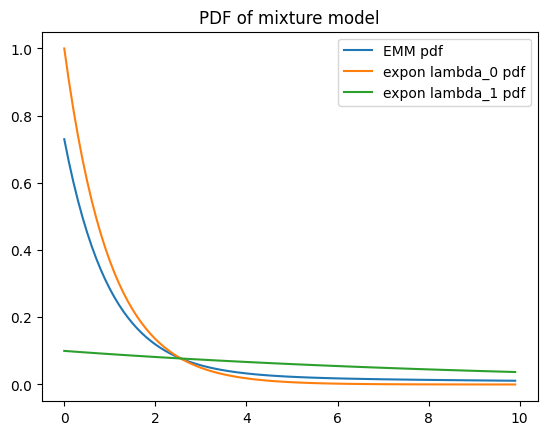

In [4]:
# Plot PDF

x_axis = np.arange(0, 10, 0.1)

fig, ax = plt.subplots(1, 1)
ax.plot(x_axis, T_model.pdf(x_axis), label='EMM pdf' )
ax.plot(x_axis, expon.pdf(x_axis, 0, 1/T_model.lambdas[0]), label='expon lambda_0 pdf')
ax.plot(x_axis, expon.pdf(x_axis, 0,  1/T_model.lambdas[1]), label='expon lambda_1 pdf')

ax.legend()
ax.set_title("PDF of mixture model")

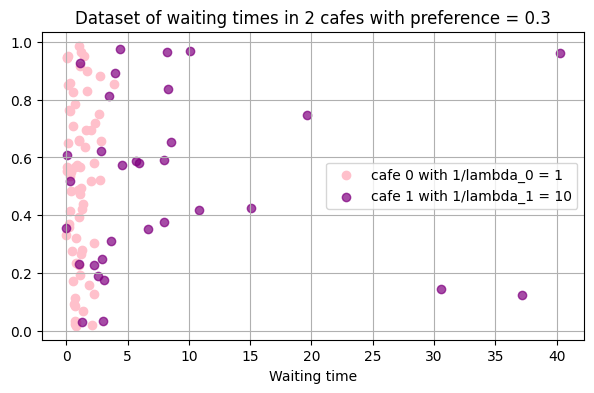

In [5]:
# Generate samples

samples, cluster_assignments = T_model.sample(100)

T_model.plot_samples()

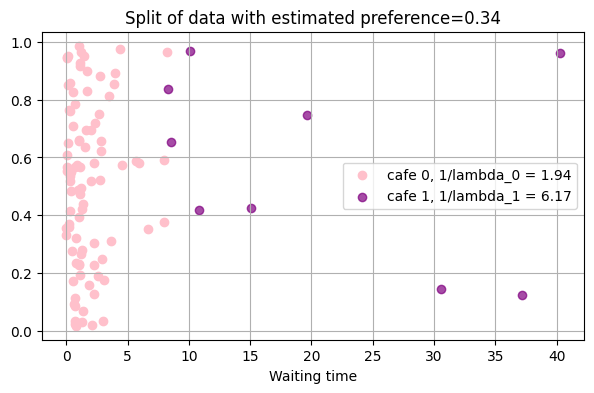

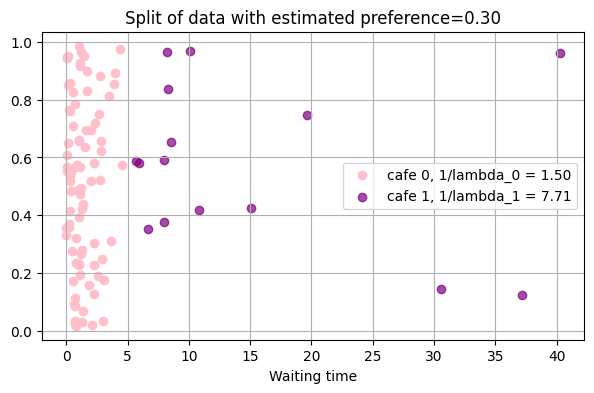

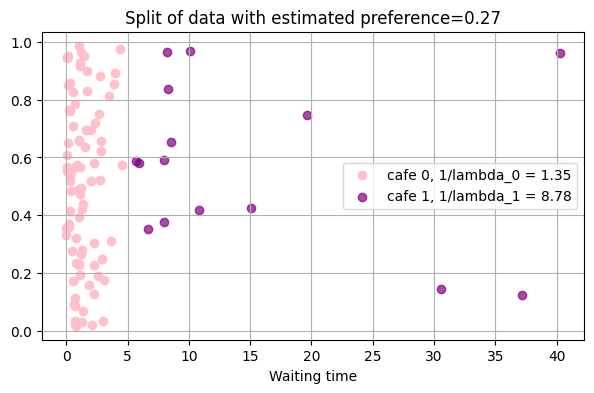

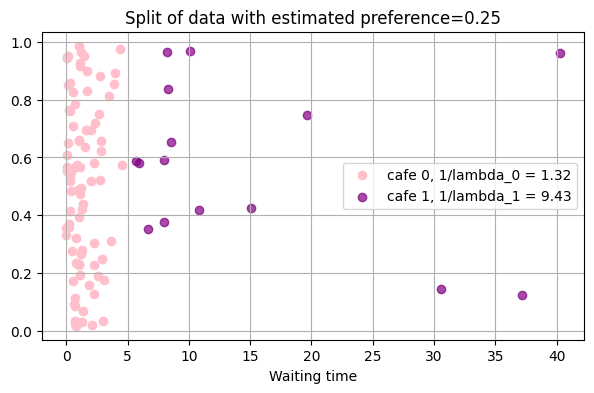

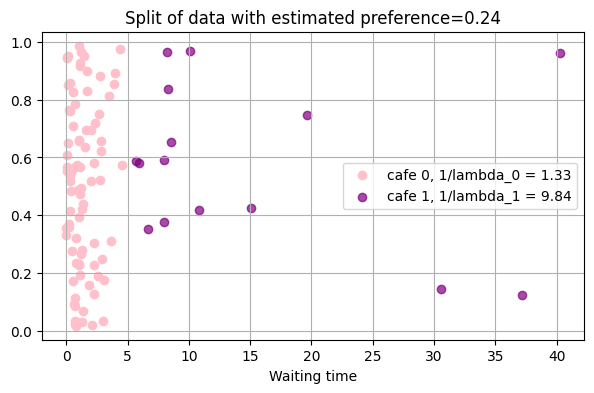

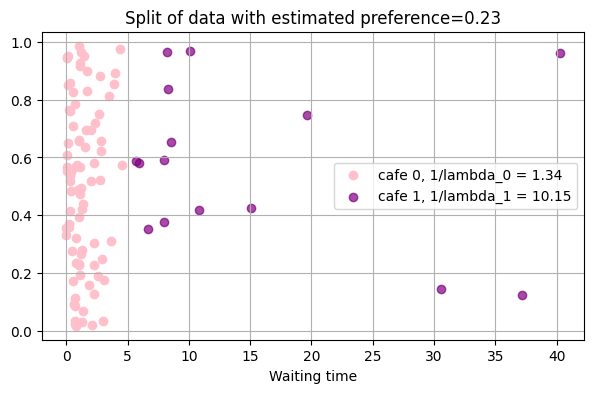

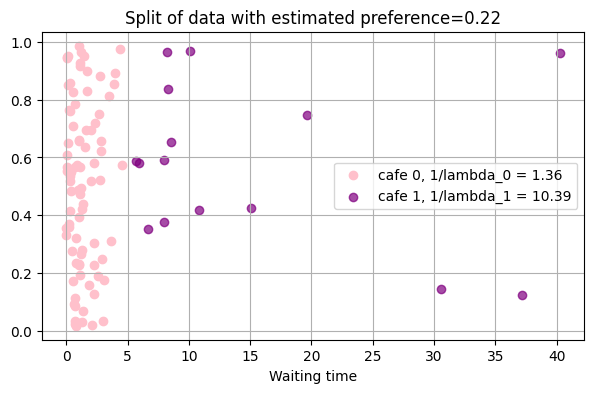

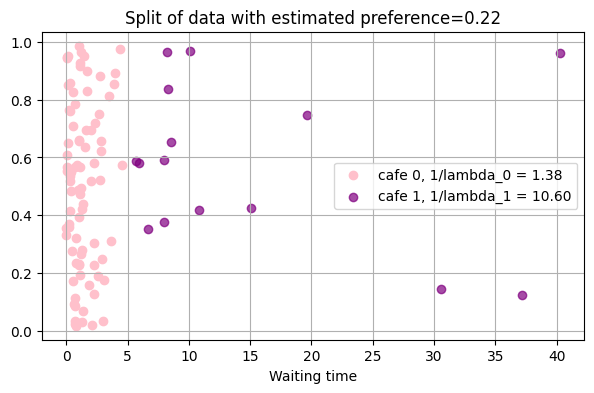

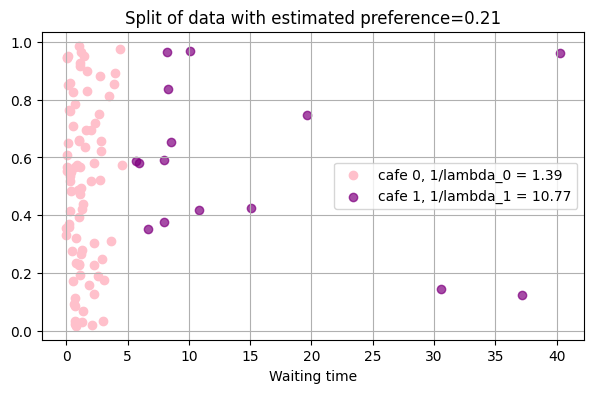

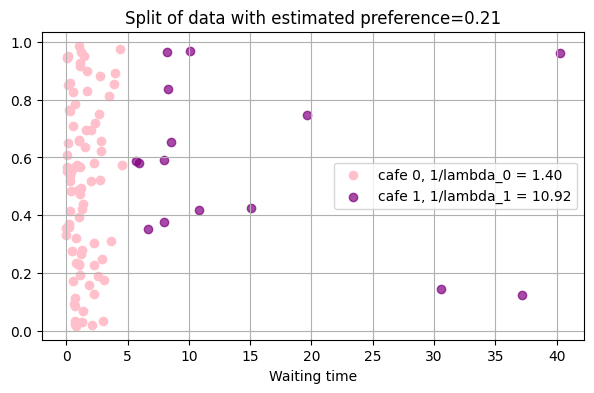

In [6]:
# Set initial values and fit EM

T_mean_1_init = 5
T_mean_2_init = 15

preference_init = 0.5

Q_history = T_model.fitEM(samples, 10, 1. / T_mean_1_init , 1 / T_mean_2_init, preference_init)


Text(0, 0.5, 'Q value')

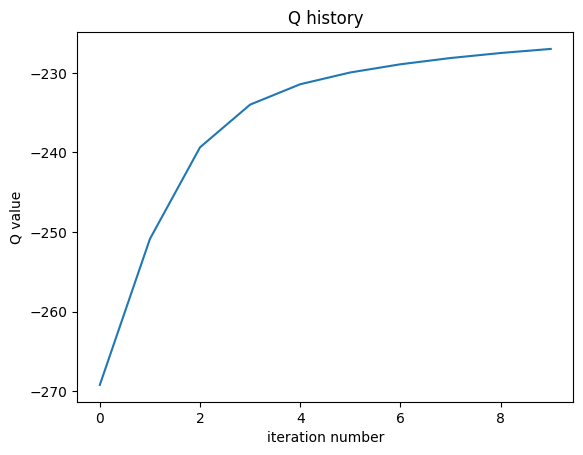

In [7]:
plt.plot(Q_history)
plt.title("Q history")
plt.xlabel("iteration number")
plt.ylabel("Q value")